In [1]:
!pip install datasets

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install seaborn pandas numpy matplotlib sklearn torch 

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Using cached https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/packages/packages/10/5b/0479d7d845b5ba410ca702ffcd7f2cd95a14a4dfff1fde2637802b258b9b/seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# import libraries

import seaborn as sns
import pandas as pd
import numpy as np
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))

from datasets import list_datasets, load_dataset
from pprint import pprint

In [5]:
datasets_list = list_datasets() 
#pprint(datasets_list,compact=True) 

Colab craches skip this for now

In [7]:
hate_speech = load_dataset("tweets_hate_speech_detection")

Using custom data configuration default


Generating train split:   0%|          | 0/31962 [00:00<?, ? examples/s]

Dataset tweets_hate_speech_detection downloaded and prepared to C:\Users\D073999\.cache\huggingface\datasets\tweets_hate_speech_detection\default\0.0.0\c6b6f41e91ac9113e1c032c5ecf7a49b4e1e9dc8699ded3c2d8425c9217568b2. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df_hate_speech = hate_speech["train"].to_pandas()

In [9]:
df_hate_speech.shape

(31962, 2)

In [10]:
df_hate_speech['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [11]:
df_hate_speech["tweet"]
tweet_df = df_hate_speech.sort_values(by='tweet', ascending=False)
tweet_df

label                                              tweet
29615      0  ó¾­© duchess ó¾  roxie sinesh  ó¾­© â½ #sup...
8385       0  ó¾¬¥ó¾ó¾¬ó¾­ #daughter @user just got #gra...
22314      0  ó¾¬chill time with my fave guilty pleasure an...
11031      0  ó¾¬ó¾¬ó¾¬ love you. ó¾¬ó¾¬ó¾¬ . #sunday ...
4739       0  ó¾ð»ó¾ð»ó¾ð»   #sunday  #relax #fu...
...      ...                                                ...
2902       0    #arkansasdentalclinic  the fun office! for a...
1589       0    #americans displaced of their home, they are...
19410      0    #actionneeded nearly 12,000 pregnant women i...
9207       0     #joy #joy,   #joy #joy. who knows what i'm ...
30673      0     #90th bihday to #her #majesty the #queen, q...

[31962 rows x 2 columns]

In [12]:
data = df_hate_speech

C:\Users\D073999\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


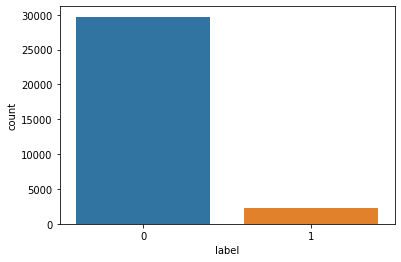

In [13]:
#https://medium.com/analytics-vidhya/twitter-sentiment-analysis-8ef90df6579c
import seaborn as sns
ax=sns.countplot(data.label);

In [14]:
# removing usernames from tweet
data['new_tweet'] = data.tweet.str.replace('@user', '')
data.head()

label                                              tweet  \
0      0  @user when a father is dysfunctional and is so...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                           new_tweet  
0   when a father is dysfunctional and is so self...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the time in ...  
4             factsguide: society now    #motivation

In [15]:
!pip install emoji
import emoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Using cached emoji-1.7.0-py3-none-any.whl


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


In [17]:
#Removing Punctuations, Numbers, and Special Characters
#[a-zA-Z] = Any single character in the range a-z or A-Z
# ^ = Start of line 
# $ = End of line
#data["new_tweet"] = data["new_tweet"].str.replace("[^a-zA-Z#]", " ")
data["new_tweet"] = data["new_tweet"].str.replace("#", " ")
data.head()

label                                              tweet  \
0      0  @user when a father is dysfunctional and is so...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                           new_tweet  
0   when a father is dysfunctional and is so self...  
1    thanks for  lyft credit i can't use cause th...  
2                                bihday your majesty  
3   model   i love u take with u all the time in ...  
4             factsguide: society now     motivation

In [18]:
# rm html tags
import re as re

data['new_tweet'] = data['new_tweet'].apply(lambda t: re.sub('<.*?>','',t)) 

In [19]:
data['new_tweet'] = data['new_tweet'].apply(lambda t: emoji.demojize(t.lower(), language='en'))
data.head(30)

label                                              tweet  \
0       0  @user when a father is dysfunctional and is so...   
1       0  @user @user thanks for #lyft credit i can't us...   
2       0                                bihday your majesty   
3       0  #model   i love u take with u all the time in ...   
4       0             factsguide: society now    #motivation   
5       0  [2/2] huge fan fare and big talking before the...   
6       0  @user camping tomorrow @user @user @user @user...   
7       0  the next school year is the year for exams.ð...   
8       0  we won!!! love the land!!! #allin #cavs #champ...   
9       0  @user @user welcome here !  i'm   it's so #gr8 !    
10      0  â #ireland consumer price index (mom) climbe...   
11      0  we are so selfish. #orlando #standwithorlando ...   
12      0  i get to see my daddy today!!   #80days #getti...   
13      1  @user #cnn calls #michigan middle school 'buil...   
14      1  no comment!  in #australia   #opkillingbay #se...   
15      0  ouch...junior is angryð#got7 #junior #yugyo...   
16      0  i am thankful for having a paner. #thankful #p...   
17      1                             retweet if you agree!    
18      0  its #friday! ð smiles all around via ig use...   
19      0  as we all know, essential oils are not made of...   
20      0  #euro2016 people blaming ha for conceded goal ...   
21      0  sad little dude..   #badday #coneofshame #cats...   
22      0  product of the day: happy man #wine tool  who'...   
23      1    @user @user lumpy says i am a . prove it lumpy.   
24      0  @user #tgif   #ff to my #gamedev #indiedev #in...   
25      0  beautiful sign by vendor 80 for $45.00!! #upsi...   
26      0  @user all #smiles when #media is   !! ðð...   
27      0  we had a great panel on the mediatization of t...   
28      0        happy father's day @user ðððð     
29      0  50 people went to nightclub to have a good nig...   

                                            new_tweet  
0    when a father is dysfunctional and is so self...  
1     thanks for  lyft credit i can't use cause th...  
2                                 bihday your majesty  
3    model   i love u take with u all the time in ...  
4              factsguide: society now     motivation  
5   [2/2] huge fan fare and big talking before the...  
6                    camping tomorrow        dannyâ¦  
7   the next school year is the year for exams.ð...  
8   we won!!! love the land!!!  allin  cavs  champ...  
9               welcome here !  i'm   it's so  gr8 !   
10  â  ireland consumer price index (mom) climbe...  
11  we are so selfish.  orlando  standwithorlando ...  
12  i get to see my daddy today!!    80days  getti...  
13    cnn calls  michigan middle school 'build the...  
14  no comment!  in  australia    opkillingbay  se...  
15  ouch...junior is angryð got7  junior  yugyo...  
16  i am thankful for having a paner.  thankful  p...  
17                             retweet if you agree!   
18  its  friday! ð smiles all around via ig use...  
19  as we all know, essential oils are not made of...  
20   euro2016 people blaming ha for conceded goal ...  
21  sad little dude..    badday  coneofshame  cats...  
22  product of the day: happy man  wine tool  who'...  
23                lumpy says i am a . prove it lumpy.  
24    tgif    ff to my  gamedev  indiedev  indiega...  
25  beautiful sign by vendor 80 for $45.00!!  upsi...  
26   all  smiles when  media is   !! ðð  pre...  
27  we had a great panel on the mediatization of t...  
28             happy father's day  ðððð    
29  50 people went to nightclub to have a good nig...

In [20]:
!pip install autocorrect

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=654b78b0e1b78f2ffd536400ce87e9ba6e64e63c6c4bb079edb96f7663b21552
  Stored in directory: c:\users\d073999\appdata\local\pip\cache\wheels\8f\4f\32\2230d32fd37dd01c560e2b4d13df51e08b5aa096b4830ddcc9
Successfully built autocorrect


In [21]:
from autocorrect import Speller
data['new_tweet'] = data['new_tweet'].apply(lambda t: Speller(t))
data

NotImplementedError: 
language ' when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.    run' not supported
supported languages: en, pl, ru, uk, tr, es, pt, cs, el, it, fr, vi
you can easily add new languages by following instructions at
https://github.com/fsondej/autocorrect/tree/master#adding-new-languages


In [22]:
#tokenization
data["new_tweet"] = data["new_tweet"].apply(lambda x: x.split())
data.head()

label                                              tweet  \
0      0  @user when a father is dysfunctional and is so...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                           new_tweet  
0  [when, a, father, is, dysfunctional, and, is, ...  
1  [thanks, for, lyft, credit, i, can't, use, cau...  
2                            [bihday, your, majesty]  
3  [model, i, love, u, take, with, u, all, the, t...  
4            [factsguide:, society, now, motivation]

In [23]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data["new_tweet"]= data["new_tweet"].apply(lambda x: [stemmer.stem(i) for i in x])
data.head()

label                                              tweet  \
0      0  @user when a father is dysfunctional and is so...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                           new_tweet  
0  [when, a, father, is, dysfunct, and, is, so, s...  
1  [thank, for, lyft, credit, i, can't, use, caus...  
2                            [bihday, your, majesti]  
3  [model, i, love, u, take, with, u, all, the, t...  
4                 [factsguide:, societi, now, motiv]

In [25]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
import string
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]
data['new_tweet'] = data['new_tweet'].apply(process)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D073999\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


label                                              tweet  \
0      0  @user when a father is dysfunctional and is so...   
1      0  @user @user thanks for #lyft credit i can't us...   
2      0                                bihday your majesty   
3      0  #model   i love u take with u all the time in ...   
4      0             factsguide: society now    #motivation   

                                           new_tweet  
0  [kid, father, selfish, run, drag, dysfunction....  
1  [pdx., offer, getthank, disapoint, van, thank,...  
2                                  [bihday, majesti]  
3  [urð±!!!, model, u, ðððð, take, l...  
4                      [societi, factsguide:, motiv]

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
# get individual words
words = []
for line in data["new_tweet"]: 
 words.extend(line)
 
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
 background_color="white",
 max_words=2000,
 stopwords=stopwords
 ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

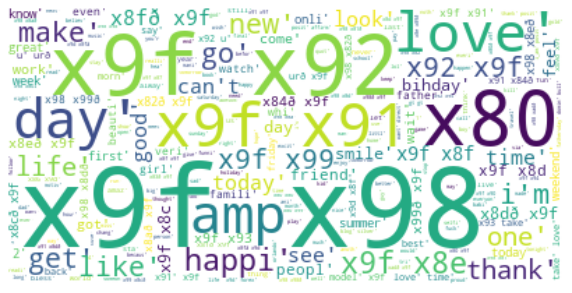

In [18]:
positive = [r for r in data['new_tweet'][data['label']==0]]

pos = ''.join(str(v) for v in positive)#''.join(positive)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

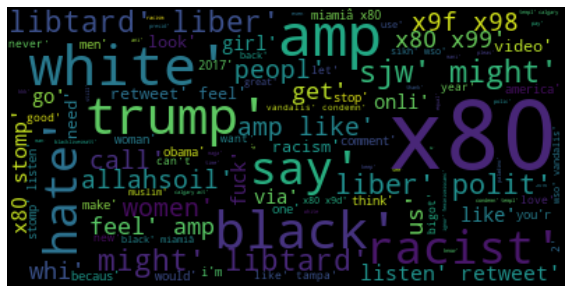

In [ ]:
negative = [r for r in data['new_tweet'][data['label']==1]]
neg = ''.join(str(v) for v in negative)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
   ).generate(neg)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
#Split data into training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

x_train, x_test, y_train, y_test =     train_test_split(data["new_tweet"], 
      data["label"], test_size = 0.2, random_state = 42)

In [29]:
!pip install imblearn

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple
  Using cached https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/packages/packages/83/92/a4d1f42b29e9f62f9c3fad68d28282a9610a02801e1d89945702f981dd8e/imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


You should consider upgrading via the 'c:\users\d073999\miniconda3\python.exe -m pip install --upgrade pip' command.


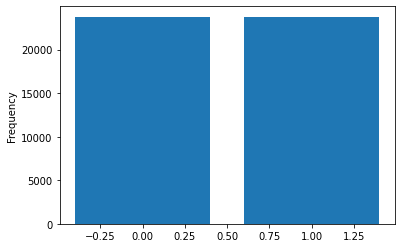

new_tweet  label
0  [years., attent, past, becaus, year/8, â¦, pa...      1
1  [pa, gmw, build, salford, fun, outdoor, guid, ...      0
2  [gaystyl, gdegblog, gayguy, ð», lifestyl, ð...      0
3                              [fact, true, fashion]      0
4  [muse, gracious, design, share, jewelry!, busi...      0

In [30]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_blanaced, y_train_balanced = sampler.fit_resample(np.array(x_train).reshape(-1,1), list(y_train))
data = x_train_blanaced
label = y_train_balanced
class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['new_tweet'])
data['label'] = y_train_balanced
data.head()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
xd = pd.Series(x_train_blanaced.flatten())
text = xd.map(' '.join)
x_train_counts = count_vect.fit_transform(text)
x_train_tfidf = transformer.fit_transform(x_train_counts)
print(x_train_counts.shape)
print(x_train_tfidf.shape)
#Output :(25569, 27304) (25569, 27304)
text = x_test.map(' '.join)
x_test_counts = count_vect.transform(text)
x_test_tfidf = transformer.transform(x_test_counts)
print(x_test_counts.shape)
print(x_test_tfidf.shape)
#Output : (6393, 27304) (6393, 27304)

(47566, 33166)
(47566, 33166)
(6393, 33166)
(6393, 33166)


In [32]:
def split_folds(data, target, L):
    perm = np.random.permutation(range(len(target)))
    print("here 1")
    #print(np.array_split(data[perm], 2))
    #X_folds = np.array_split(data[perm], L)
    print("her 2", target[2])
    y_folds = np.array_split(target[perm], L)
    print("her 3")
    
    return X_folds, y_folds

In [33]:
def cross_validate(data, target, k, L):
        Ls = [2, 5, 10]

        sklearn_knn = KNeighborsClassifier(n_neighbors=k)
        

        X_folds, y_folds = split_folds(data, target, L)
        error_rates_own = []
        error_rates_sklearn = []
        for n in range(L):
            # construct train and test set from folds
            X_train_f = np.concatenate([X_folds[i].toarray() for i in range(L) if i != n])
            X_test_f = X_folds[n]
            y_train_f = np.concatenate([y_folds[i].toarray() for i in range(L) if i != n])
            y_test_f = y_folds[n]
            # run our own nearest neighbor classifier
            #result_own = k_nearest_neighbors(X_train_f, y_train_f, X_test_f, k)
            #error_rates_own.append( 100 * (1 - np.count_nonzero(result_own == y_test_f) / len(result_own)))
            # run sklearn's nearest neighbor classifier
            sklearn_knn.fit(X_train_f, y_train_f)
            result_sklearn = sklearn_knn.predict(X_test_f)
            error_rates_sklearn.append(100* (1- np.count_nonzero(result_sklearn == y_test_f) / len(result_sklearn)))

        return np.mean(error_rates_own), np.std(error_rates_own), np.mean(error_rates_sklearn), np.std(error_rates_sklearn)

In [24]:
# run experiments for say k=5
Ls = [2,5,10]
from sklearn.neighbors import KNeighborsClassifier
Ls = [2, 5, 10]
ks = [1, 5]
values = np.zeros((len(ks), len(Ls), 4)) # k, L, results
for i, k in enumerate(ks):
    for j, L in enumerate(Ls):
      values[i, j, :] = cross_validate(x_train_tfidf, y_train_balanced, k, L)

here 1
her 2 0


TypeError: ignored

In [34]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
sklearn_knn = KNeighborsClassifier(n_neighbors=2)
for train_indices, test_indices in cv.split(x_train_tfidf, y_train_balanced):
    display(test_indices)
    
    train_data = x_train_tfidf[train_indices]
    train_target = y_train_balanced[train_indices]
    
    #dt.fit(train_data, train_target)
    sklearn_knn.fit(train_data, train_target)
    test_data = data[test_indices]
    test_target = y_train_balanced[test_indices]
    
    #test_prediction = dt.predict(test_data)
    result_sklearn = sklearn_knn.predict(test_data)

NameError: name 'KNeighborsClassifier' is not defined

In [36]:
def test_classifier(x_test, y_test, classifier_callback):
    error = classifier_callback(x_test) != y_test
    return np.mean(error)

In [35]:
def split_folds(data, target, L):
    X_folds = []
    Y_folds = []
    #indices based on rows
    fold_indices = np.arange(data.shape[0])
    #shuffle and split indices
    folds = np.array_split(np.random.permutation(fold_indices), L)

    for fold in folds:
        X_folds.append(data[fold])
        Y_folds.append(target[fold])
        
    return X_folds, Y_folds

In [29]:
from sklearn.neighbors import KNeighborsClassifier

Ls = [2,5,10]
ks = [1,5,33]
# shape: classifier X k X L X [errors]
errors = {'diy' : {}, 'sk' : {}}
for k in ks:
    errors['diy'][k] = {}
    errors['sk'][k] = {}
    for L in Ls:
        errors['diy'][k][L] = []
        errors['sk'][k][L] = []

for L in Ls:
    X_folds, Y_folds = split_folds(x_train_tfidf, np.array(y_train_balanced), L)
    fold_count = len(X_folds)
    for pick in range(fold_count):
        test_set_x = X_folds[pick]
        test_set_y = Y_folds[pick]
        train_set_x = np.concatenate(X_folds[:pick] + X_folds[pick+1:])
        train_set_y = np.concatenate(Y_folds[:pick] + Y_folds[pick+1:])
        for k in ks:
            #diy_classifier = KNearestNeighbour(train_set_x, train_set_y, k)
            #error = test_classifier(test_set_x, test_set_y, diy_classifier.predict)
            errors['diy'][k][L].append(error)

            sk_classifier = KNeighborsClassifier(n_neighbors = k)
            sk_classifier.fit(train_set_x, train_set_y)
            error = test_classifier(test_set_x, test_set_y, sk_classifier.predict)
            errors['sk'][k][L].append(error)
          

ValueError: ignored

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_tfidf,y_train_balanced)
predictions = model.predict(x_test_tfidf)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,predictions)
#Output: array([[5898,   39],        
#               [ 207,  249]], dtype=int64)
#f1-score
f1_score(y_test,predictions)
#Output : 0.6693548387096774
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100
# output:96.15204129516658

95.11966213045518

In [61]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def corss_val(model):
    kf = StratifiedKFold(5, shuffle=True, random_state=1)
    auc = cross_val_score(
        model, x_train_tfidf, y_train_balanced, scoring="f1", cv=kf)
    print(auc)
    return auc.mean()
get_auc_CV(model)

[0.99705325 0.99705449 0.99789828 0.99694769 0.99652668]


0.9970960783104885

In [38]:
len(y_train_balanced)
x_train_tfidf.shape

(47566, 33166)

In [39]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='macro')

0.7434062654371809

In [41]:
X_folds, Y_folds = split_folds(x_train_tfidf, np.array(y_train_balanced), 2)

In [58]:

Ls = [2,5,10]
ks = [1,5,33]
# shape: classifier X k X L X [errors]
errors = {'diy' : {}, 'sk' : {}}
for k in ks:
    errors['diy'][k] = {}
    errors['sk'][k] = {}
    for L in Ls:
        errors['diy'][k][L] = []
        errors['sk'][k][L] = []

for L in Ls:
    X_folds, Y_folds = split_folds(x_train_tfidf, np.array(y_train_balanced), L)
    fold_count = len(X_folds)
    for pick in range(fold_count):
        test_set_x = X_folds[pick]
        test_set_y = Y_folds[pick]
        
        train_set_x = sparse.vstack([ X_folds[pick], X_folds[pick+1] ]).toarray()
        train_set_y = sparse.vstack([X_folds[pick], X_folds[pick+1]]).toarray() 
                        
        for k in ks:
            sk_classifier = KNeighborsClassifier(n_neighbors = k)
            sk_classifier.fit(train_set_x, train_set_y)
            error = test_classifier(test_set_x, test_set_y, sk_classifier.predict)
            print(error)
            errors['sk'][k][L].append(error)
          

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
errors

In [ ]:
from scipy import sparse
print(X_folds[0])
# Stack matrices horizontally (column wise) using hstack().
trainX_tfidf = sparse.hstack([X_folds[0], X_folds[1]])

# Convert Spare Matrix into an Array using toarray() 
trainX_tfidf_arr = trainX_tfidf.toarray()

# Concatenate TF-IDF and Cosine Similarity using numpy.c_[], 
# which is just another column stack.
trainX_tfidf_cos = np.c_[trainX_tfidf_arr, trainX_tfidf_arr]
trainX_tfidf_cos

In [55]:
x_train_tfidf.shape

(47566, 33166)

In [50]:
print(X_folds[0].shape)
print(X_folds[1].shape)
print(trainX_tfidf.shape)
trainX_tfidf_arr = sparse.vstack([ X_folds[0], X_folds[1] ]).toarray()

# Convert Spare Matrix into an Array using toarray() 
#trainX_tfidf_arr = trainX_tfidf.toarray()
print(trainX_tfidf.shape)

(23783, 33166)
(23783, 33166)
(47566, 33166)
(47566, 33166)
